In [11]:
import sys
sys.path.append('/Users/lisacarr/Documents/SEMDS')
sys.path.append('/Users/lisacarr/Documents/SEMDS/TILseg_Project2024')

import numpy as np
import cv2
from sklearn.cluster import DBSCAN

from TILseg_Project2024.km_dbscan import kmeans_superpatch_fit, kmeans_til_label 

In [2]:
kmeans = kmeans_superpatch_fit('/Users/lisacarr/Desktop/images/superpatch_training.tif')

In [3]:
patch_path = '/Users/lisacarr/Desktop/images/test patches/position_7_8tissue.tif'
tils_mask_raw, km_labels, til_cluster_label = kmeans_til_label(kmeans, patch_path)

In [8]:
print(km_labels.shape)

(2810, 3992)


In [9]:
binary_tils_mask = (tils_mask_raw > 0).astype(np.uint8)

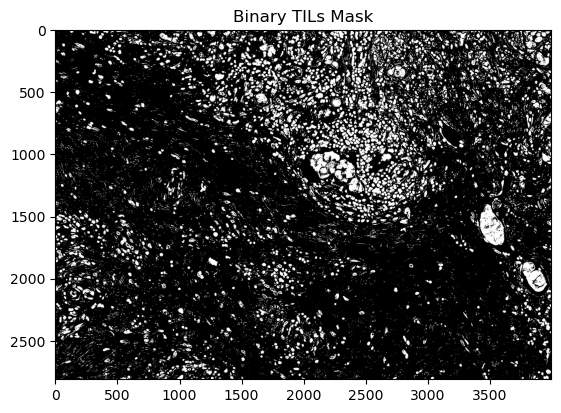

In [10]:
import matplotlib.pyplot as plt

# Assuming binary_tils_mask is your binary mask
plt.imshow(binary_tils_mask, cmap='gray')
plt.title('Binary TILs Mask')
plt.show()

In [38]:
# Assuming binary_tils_mask is your binary mask
foreground_coords = np.argwhere(binary_tils_mask == 1)

# Prepare feature matrix
features = foreground_coords

eps_dbscan = 15  # Adjust the value based on the scale of your coordinates
min_samples_dbscan = 100  # Adjust the value based on your requirements
dbscan = DBSCAN(eps=eps_dbscan, min_samples=min_samples_dbscan)
dbscan_labels = dbscan.fit_predict(features)

In [39]:

# Assuming dbscan_labels is your DBSCAN cluster labels
unique_labels, label_counts = np.unique(dbscan_labels, return_counts=True)

# Print the counts for each unique label
for label, count in zip(unique_labels, label_counts):
    print(f"Label {label}: Count {count}")

Label -1: Count 91964
Label 0: Count 184
Label 1: Count 1627
Label 2: Count 11201
Label 3: Count 37472
Label 4: Count 2533
Label 5: Count 299
Label 6: Count 349
Label 7: Count 783
Label 8: Count 662653
Label 9: Count 759
Label 10: Count 17337
Label 11: Count 32863
Label 12: Count 635
Label 13: Count 168
Label 14: Count 844
Label 15: Count 92
Label 16: Count 150
Label 17: Count 1266
Label 18: Count 263
Label 19: Count 1250
Label 20: Count 90
Label 21: Count 168
Label 22: Count 114
Label 23: Count 2191
Label 24: Count 28477
Label 25: Count 447
Label 26: Count 4482
Label 27: Count 583
Label 28: Count 4142
Label 29: Count 225
Label 30: Count 560
Label 31: Count 709
Label 32: Count 668
Label 33: Count 329
Label 34: Count 294
Label 35: Count 1452
Label 36: Count 785
Label 37: Count 650
Label 38: Count 132
Label 39: Count 527
Label 40: Count 402
Label 41: Count 1545
Label 42: Count 1006
Label 43: Count 719
Label 44: Count 241
Label 45: Count 1558
Label 46: Count 650
Label 47: Count 1070
Label

In [36]:
# Create a mask for clustered points (non-outliers)
clustered_mask = (dbscan_labels != -1)

# Create a new array to represent the clusters as integers
clustered_mask_values = np.zeros_like(binary_tils_mask, dtype=int)
clustered_mask_values[nonzero_indices[clustered_mask, 0], nonzero_indices[clustered_mask, 1]] = dbscan_labels[clustered_mask] + 1  # Adding 1 to avoid conflict with -1
clustered_mask_values.shape

(2810, 3992)

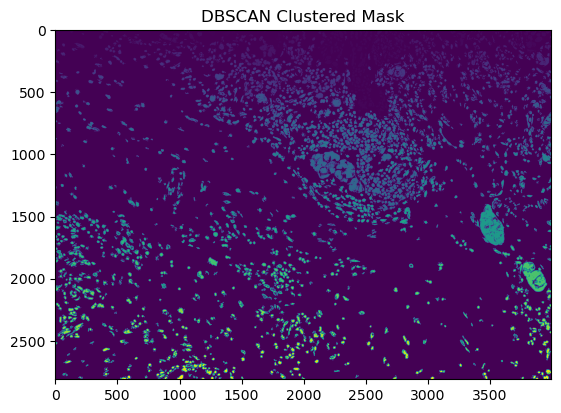

In [40]:
# Visualize the new mask
plt.imshow(clustered_mask_values, cmap='viridis')
plt.title('DBSCAN Clustered Mask')
plt.show()

In [4]:
patch_path = '/Users/lisacarr/Desktop/images/test patches/position_7_8tissue.tif'
final_labels = km_dbscan(kmeans, patch_path, 1.0, 10)

: 

In [9]:
def visualize_clusters(labels, title):
    plt.imshow(labels.reshape(image.shape[:2]), cmap='viridis')
    plt.title(title)
    plt.colorbar()

In [ ]:
# Visualize KMeans clusters
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
visualize_clusters(km_labels, 'KMeans Clusters')

# Visualize DBSCAN clusters
plt.subplot(1, 3, 2)
visualize_clusters(dbscan_labels, 'DBSCAN Clusters')

# Visualize final labels
plt.subplot(1, 3, 3)
visualize_clusters(final_labels, 'Final Labels')

plt.tight_layout()
plt.show()